In [4]:
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# 1. Завантажуємо навчену модель
model = joblib.load('../models/xgboost_tuned_model.pkl')

df = pd.read_csv('../data/dataset_for_modeling.csv', index_col='DateTime', parse_dates=True)
df_daily = df['Global_active_power'].resample('D').sum().to_frame()

df_daily['day_of_week'] = df_daily.index.dayofweek
df_daily['month'] = df_daily.index.month
df_daily['day_of_year'] = df_daily.index.dayofyear

# 4. Розділяємо дані на X та y і вибираємо тестову частину
X = df_daily.drop(columns=['Global_active_power'])
X_test = X.loc['2010-01-01':]

# 5. Перевіряємо розмір - тепер він має бути правильним
print(f"Правильний розмір тестового набору X_test: {X_test.shape}")

display(X_test.head())

Правильний розмір тестового набору X_test: (330, 3)


,day_of_week,month,day_of_year
DateTime,,,
2010-01-01,4,1,1
2010-01-02,5,1,2
2010-01-03,6,1,3
2010-01-04,0,1,4
2010-01-05,1,1,5


In [5]:
print(f"Розмір тестового набору X_test, для якого розраховується SHAP: {X_test.shape}")

Розмір тестового набору X_test, для якого розраховується SHAP: (330, 3)


In [6]:
# Створюємо "пояснювач" для нашої моделі
explainer = shap.TreeExplainer(model)

# Розраховуємо SHAP values для тестового набору
print("Розрахунок SHAP values...")
shap_values = explainer.shap_values(X_test)
print("Розрахунок завершено.")

Розрахунок SHAP values...
Розрахунок завершено.


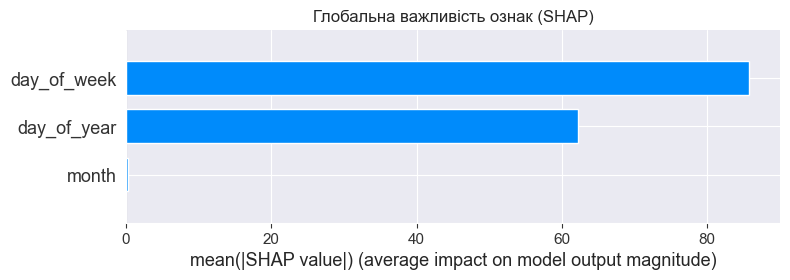

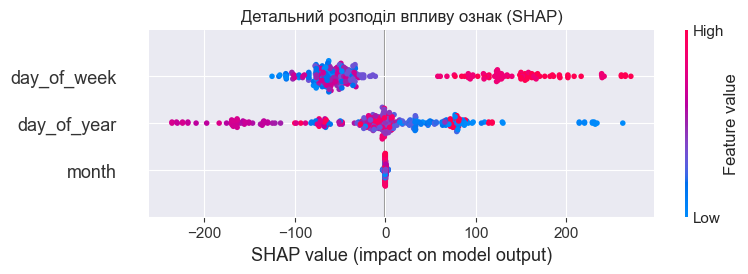

In [7]:
# Графік, що показує середній вплив кожної ознаки на прогноз
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('Глобальна важливість ознак (SHAP)')
plt.show()

# Більш детальний "бджолиний" графік
shap.summary_plot(shap_values, X_test, show=False)
plt.title('Детальний розподіл впливу ознак (SHAP)')
plt.show()

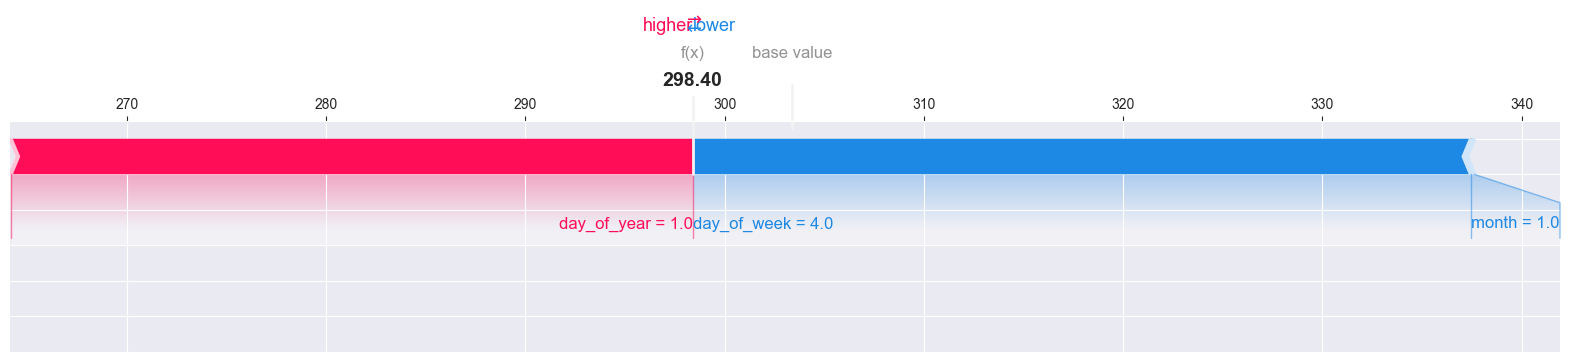

In [8]:
# Ініціалізуємо JavaScript для візуалізації в ноутбуці
shap.initjs()

# Пояснюємо прогноз для першого дня в тестовому наборі
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)